In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
diamonds = pd.read_csv("datasets/diamonds.csv")
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [3]:
# Prepare the data
# Keep only the color, cut, and price, and a column containing the logarithm of the price
diamonds = diamonds[["color", "cut", "price"]]
diamonds["log_price"] = np.log(diamonds.price)
diamonds.head()

,color,cut,price,log_price
0,E,Ideal,326,5.786897
1,E,Premium,326,5.786897
2,E,Good,327,5.789960
3,I,Premium,334,5.811141
4,J,Good,335,5.814131


<Axes: xlabel='color', ylabel='log_price'>

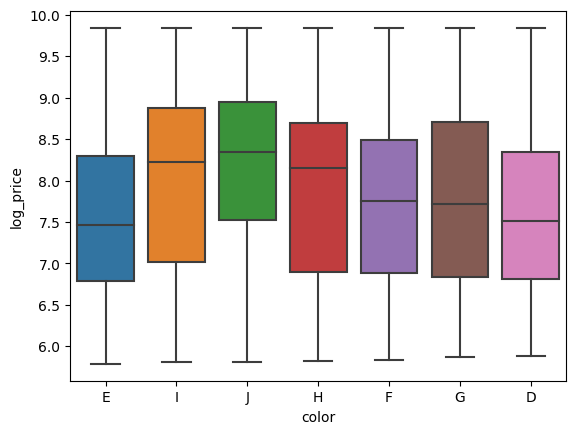

In [4]:
sns.boxplot(x="color", y="log_price", data=diamonds)

In [5]:
# There's a variation of the price based on the color
# Let's do a one-way test ANOVA

import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols(formula="log_price ~ C(color)", data=diamonds).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.026
Model:                            OLS   Adj. R-squared:                  0.026
Method:                 Least Squares   F-statistic:                     237.8
Date:                Sat, 02 Sep 2023   Prob (F-statistic):          3.77e-301
Time:                        19:02:38   Log-Likelihood:                -76617.
No. Observations:               53940   AIC:                         1.532e+05
Df Residuals:                   53933   BIC:                         1.533e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         7.6169      0.012    625.984      0.000       7.593       7.641
C(color)[T.E]    -0.0375      0.016     -2.370      0.018      -0.069      -0.006
C(color)[T.F]     0.1455      0.016      9.146      0.000       0.114       0.177
C(color)[T.G]     0.1727      0.015     11.219      0.000       0.143       0.203
C(color)[T.H]     0.3015      0.016     18.390      0.000       0.269       0.334
C(color)[T.I]     0.4061      0.018     22.250      0.000       0.370       0.442
C(color)[T.J]     0.5291      0.022     23.537      0.000       0.485       0.573
==============================================================================
Omnibus:                    11794.122   Durbin-Watson:                   0.059
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2240.596
Skew:                           0.064   Prob(JB):                         0.00
Kurtosis:                       2.010   Cond. No.                         8.56
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [6]:
# The result of the model indicates that the relationship between the color and the price is statistically significant
sm.stats.anova_lm(model, type=2)

,df,sum_sq,mean_sq,F,PR(>F)
C(color),6.0,1431.255783,238.54263,237.807767,3.767555e-301
Residual,53933.0,54099.661516,1.00309,NaN,NaN


In [7]:
# Null hypothesis: there is NO difference in price based on color grade
# Alternative hypothesis: there IS A difference in price based on color grade

# Since the P value is 3.767555e-301, we can reject the null hypothesis
# which means that there is a difference on the price of the diamonds based on their color

In [8]:
# Let's add another variable to the model to perform a twp-way ANOVA test

# Null hypotheses:
#   Color: there is NO difference in diamond price based on color.
#   Cut: there is NO difference in diamond price based on cut.
#   Color & Cut: the effect of color on diamond price is independent of the cut, and vice versa.

# Alternative hypotheses:
#   Color: there IS A difference in diamond price based on color.
#   Cut: there IS A difference in diamond price based on cut.
#   Color & Cut: there IS AN interaction effect between color and cut on diamond price.


# The colon indicates the interaction between the variables
model2 = ols(
    formula="log_price ~ C(color) + C(cut) + C(color):C(cut)", data=diamonds
).fit()

sm.stats.anova_lm(model2, type=2)

,df,sum_sq,mean_sq,F,PR(>F)
C(color),6.0,1431.255783,238.542630,242.151273,1.206538e-306
C(cut),4.0,901.918331,225.479583,228.890609,3.250547e-195
C(color):C(cut),24.0,96.058742,4.002448,4.062996,8.168980e-11
Residual,53905.0,53101.684443,0.985098,NaN,NaN


In [9]:
# The P-value is very small for all three hypotheses, so we can reject all
# Meaning that:
#   - The price is not the same for different diamond colors.
#   - The price is not the same for different diamond cuts.
#   - There is an interaction effect between color and cut on diamond price.

# ANOVA Post Hoc test

Performs a pairwise comparison between all available groups while controlling for the error rate

## Tukeys HSD
Honestly significantly different

ANOVA reveals if the means are equal of not. Tukey's HSD tell us which pair is different

In [10]:
# We'll use the model with only the Color variable
sm.stats.anova_lm(model, typ=2)

,sum_sq,df,F,PR(>F)
C(color),1431.255783,6.0,237.807767,3.767555e-301
Residual,54099.661516,53933.0,NaN,NaN


In [11]:
# Once we have a statistically significant test, we can run Tukey's HSD
from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukey_oneway = pairwise_tukeyhsd(
    endog=diamonds.log_price, groups=diamonds.color, alpha=0.05
)
tukey_oneway.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
D,E,-0.0375,0.2115,-0.0842,0.0092,False
D,F,0.1455,0.0,0.0986,0.1924,True
D,G,0.1727,0.0,0.1273,0.2181,True
D,H,0.3015,0.0,0.2532,0.3499,True
D,I,0.4061,0.0,0.3522,0.4599,True
D,J,0.5291,0.0,0.4628,0.5953,True
E,F,0.183,0.0,0.1406,0.2255,True
E,G,0.2102,0.0,0.1694,0.251,True
E,H,0.339,0.0,0.295,0.3831,True
E,I,0.4436,0.0,0.3936,0.4935,True


In [ ]:
# If the 'reject column' reads false, we cannot reject the Null Hypothesis
# The Null Hypothesis is the price of diamonds of the two color grades are the same
# For D and E colors, we cannot reject the null hypothesis, so both colors have the same price
# For D and F colors, we can reject the null hypothesis, meaning that price is different between those two colors.